# Mahalanobis Distance Anamoly Dection

https://www.youtube.com/watch?v=OLsMiKzD-rA

In [1]:
import numpy as np
import scipy

from sklearn.covariance import MinCovDet

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# gen multivariate normal data
real_cov = np.array([[.8, .3], [.3, .4]])
x1 = np.random.multivariate_normal(mean=[0,0], cov=real_cov, size=1000)
x2 = np.random.multivariate_normal(mean=[2,-2], cov=real_cov, size=50)
x = np.concatenate([x1,x2])

x

array([[ 0.65682871,  0.7554611 ],
       [ 0.11830086, -0.42998569],
       [-0.83692988, -0.96871757],
       ...,
       [ 2.13841654, -0.91062051],
       [ 2.91362307, -1.35156177],
       [ 2.55463305, -1.44968604]])

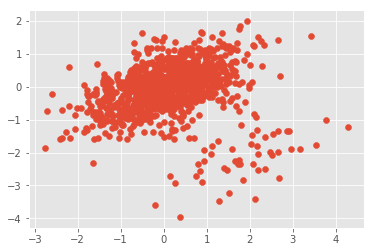

In [3]:
plt.scatter(x.T[0], x.T[1])

In [4]:
mcd = MinCovDet()
mcd.fit(x)

MinCovDet(assume_centered=False, random_state=None, store_precision=True,
     support_fraction=None)

In [5]:
m_dist = np.array([scipy.spatial.distance.mahalanobis(x[i,], 
                                                    mcd.location_, 
                                                    mcd.precision_)
                for i in range(x.shape[0])])
sq_m_dist = m_dist ** 2

# square mahalanobis distance
sq_m_dist

array([ 1.60884347,  0.8126835 ,  2.56802293, ..., 17.56653123,
       34.65258224, 31.05221057])

In [6]:
# square mahalanobis distance of multivariate normal follows chi-square dist with p vars degrees of freedom

# set threshold & classify outliers
thres = scipy.stats.chi2.ppf(0.999, x.shape[1])
outliers = (sq_m_dist > thres)

outliers

array([False, False, False, ...,  True,  True,  True])

In [7]:
sum(outliers)

52

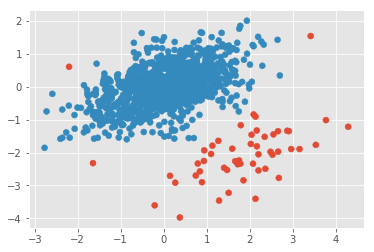

In [8]:
palette = sns.color_palette()
cluster_colors = [palette[int(not i)] for i in outliers]

plt.scatter(x.T[0], x.T[1], c=cluster_colors)